In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df != 0).all(axis=1)]
df['revenue'] = np.log(df['revenue'])
df['budget'] = np.log(df['budget'])


In [15]:
df = df.select_dtypes(include=[int, float])
df.replace(0, pd.NA, inplace=True)
df = df.dropna()
df = df.drop(columns=["id"])

In [16]:

df.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.286120,0.665316,0.204851,-0.103331,0.334508
popularity,0.286120,1.000000,0.417566,0.182416,0.288396,0.749005
revenue,0.665316,0.417566,1.000000,0.191624,0.131546,0.480460
runtime,0.204851,0.182416,0.191624,1.000000,0.387264,0.258122
vote_average,-0.103331,0.288396,0.131546,0.387264,1.000000,0.381136
vote_count,0.334508,0.749005,0.480460,0.258122,0.381136,1.000000


In [ ]:
X = df[['budget', 'vote_average']].values
y = df['revenue'].values

# TODO: Normailze values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

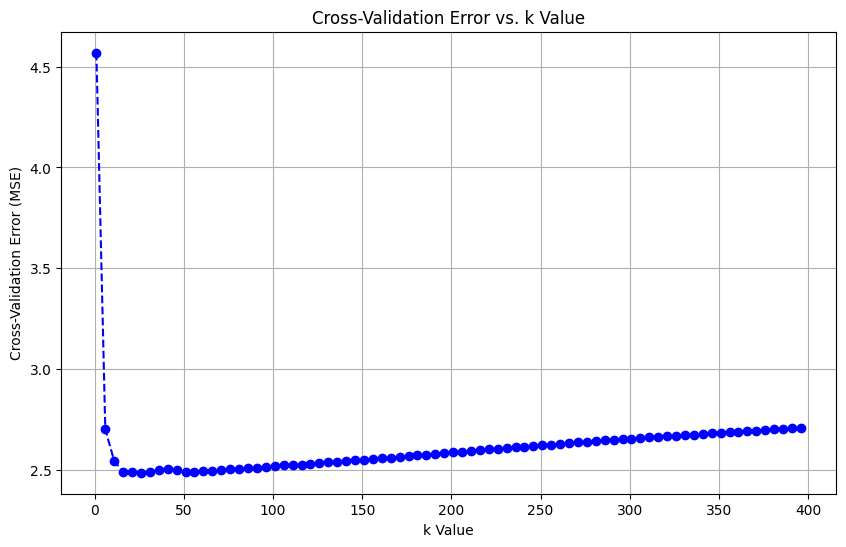

In [19]:
# Create a list of possible k values
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

n = 400

k_values = list(range(1, n, 5))

# Perform cross-validation for each k value
cv_scores = []
knn_model = None

mse_values = []
r2_values = []
m_k = -1

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    if knn_model == None or np.min(cv_scores) > -scores.mean():
        knn_model = knn
        m_k = k
    cv_scores.append(-scores.mean())
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))



# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='blue')
# print(np.min(cv_scores))
# plt.plot(np.arange(1, n + 1), np.full((n, 1),(np.min(cv_scores))), color='red')
plt.grid(True)
plt.title('Cross-Validation Error vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Cross-Validation Error (MSE)')
# plt.yticks(list(plt.yticks()[0]) + [np.min(cv_scores)])
plt.show()


In [18]:
np.min(cv_scores)

2.487137831956655

In [20]:
# knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Value: ", m_k)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


K-Value:  26
Mean Squared Error: 2.2323883586530644
R-squared: 0.5333726311975493


Text(0, 0.5, 'MSE')

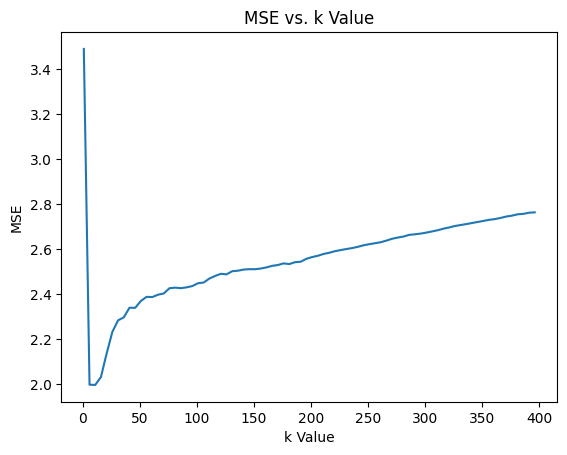

In [10]:
plt.plot(np.array(k_values), np.array(mse_values))
plt.title('MSE vs. k Value')
plt.xlabel('k Value')
plt.ylabel('MSE')

Text(0, 0.5, 'R-Square')

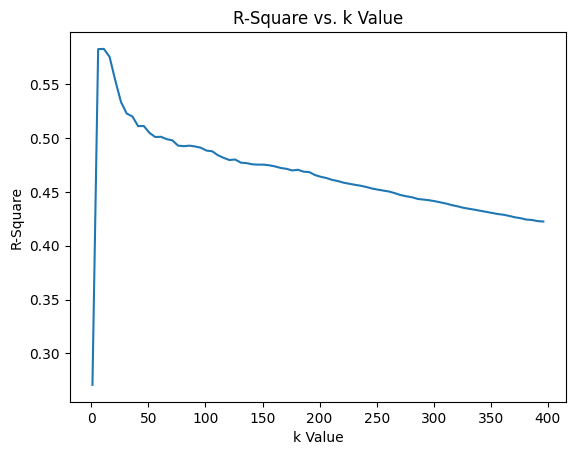

In [9]:
plt.plot(np.array(k_values), np.array(r2_values))
plt.title('R-Square vs. k Value')
plt.xlabel('k Value')
plt.ylabel('R-Square')